In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats

from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('jpeg', 'pdf')
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['figure.dpi'] = 150
sns.rcmod.set({'figure.figsize': (15, 5)})

In [2]:
df = pd.read_csv('/Users/ammar-imac/Downloads/listings.csv.gz')

In [3]:
# remove `$` from price cells
df['price'] = df['price'].apply(lambda x: x[1:])
# remove comma for large number
df['price'] = df['price'].apply(lambda x: x.replace(',', ''))
df['price'] = df['price'].astype(float)
df['price']

0         90.0
1         59.0
2        500.0
3         65.0
4         51.0
         ...  
56734     63.0
56735    125.0
56736    123.0
56737     43.0
56738     61.0
Name: price, Length: 56739, dtype: float64

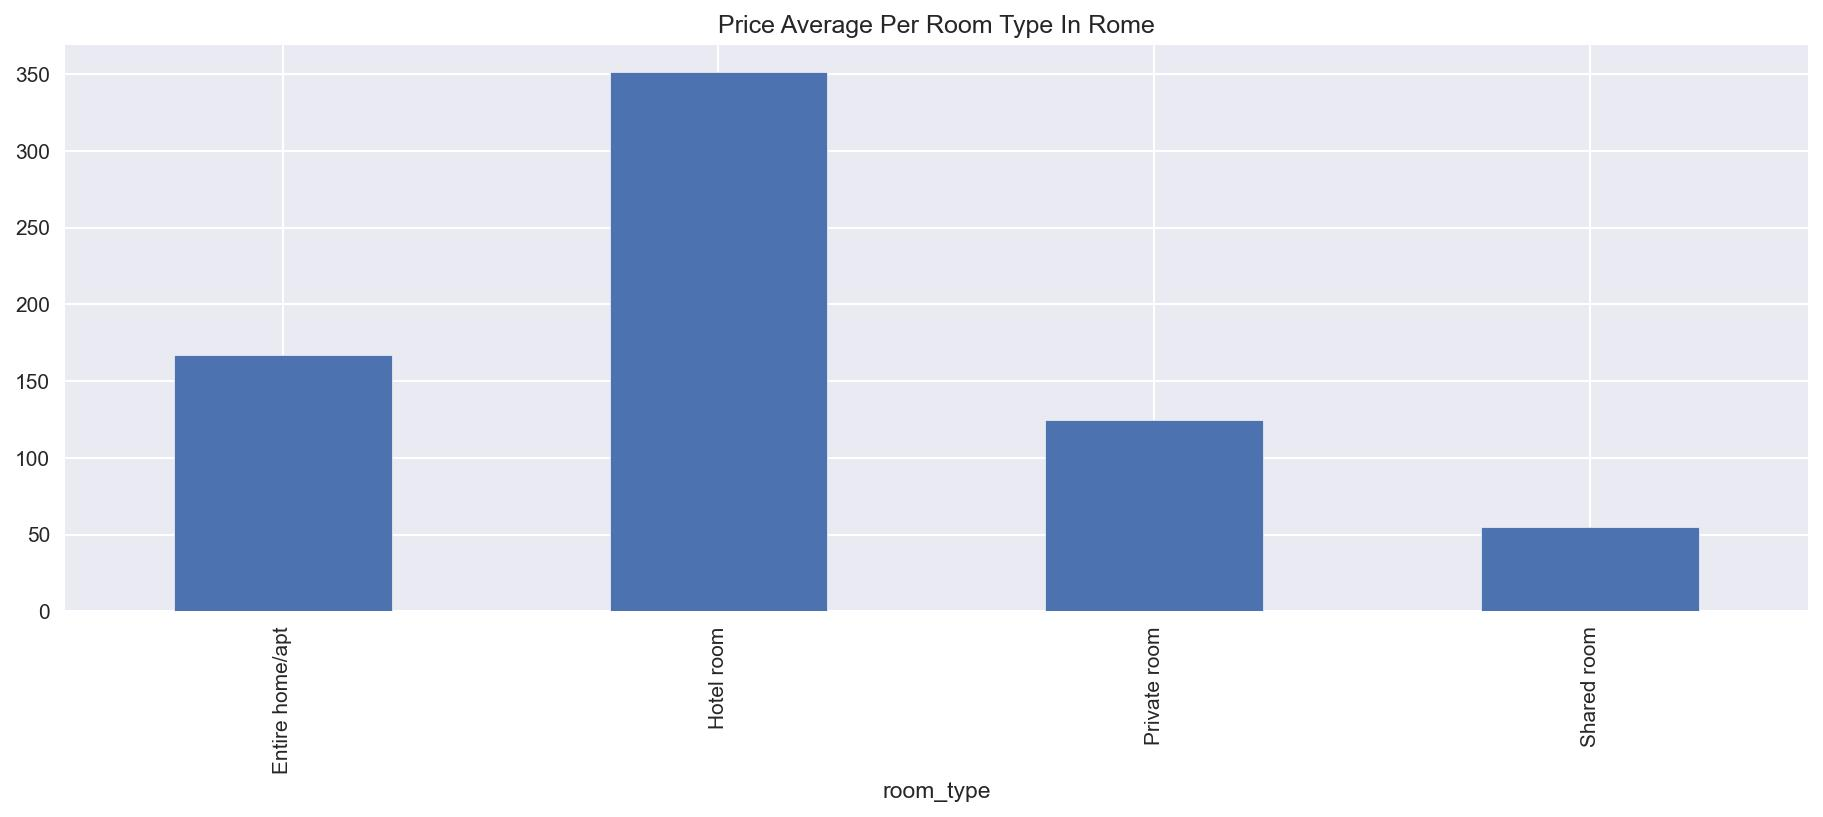

In [4]:
df.groupby('room_type')['price'].mean().plot.bar()
plt.title('price average per room type in rome'.title())
plt.show()

<AxesSubplot:xlabel='room_type', ylabel='price'>

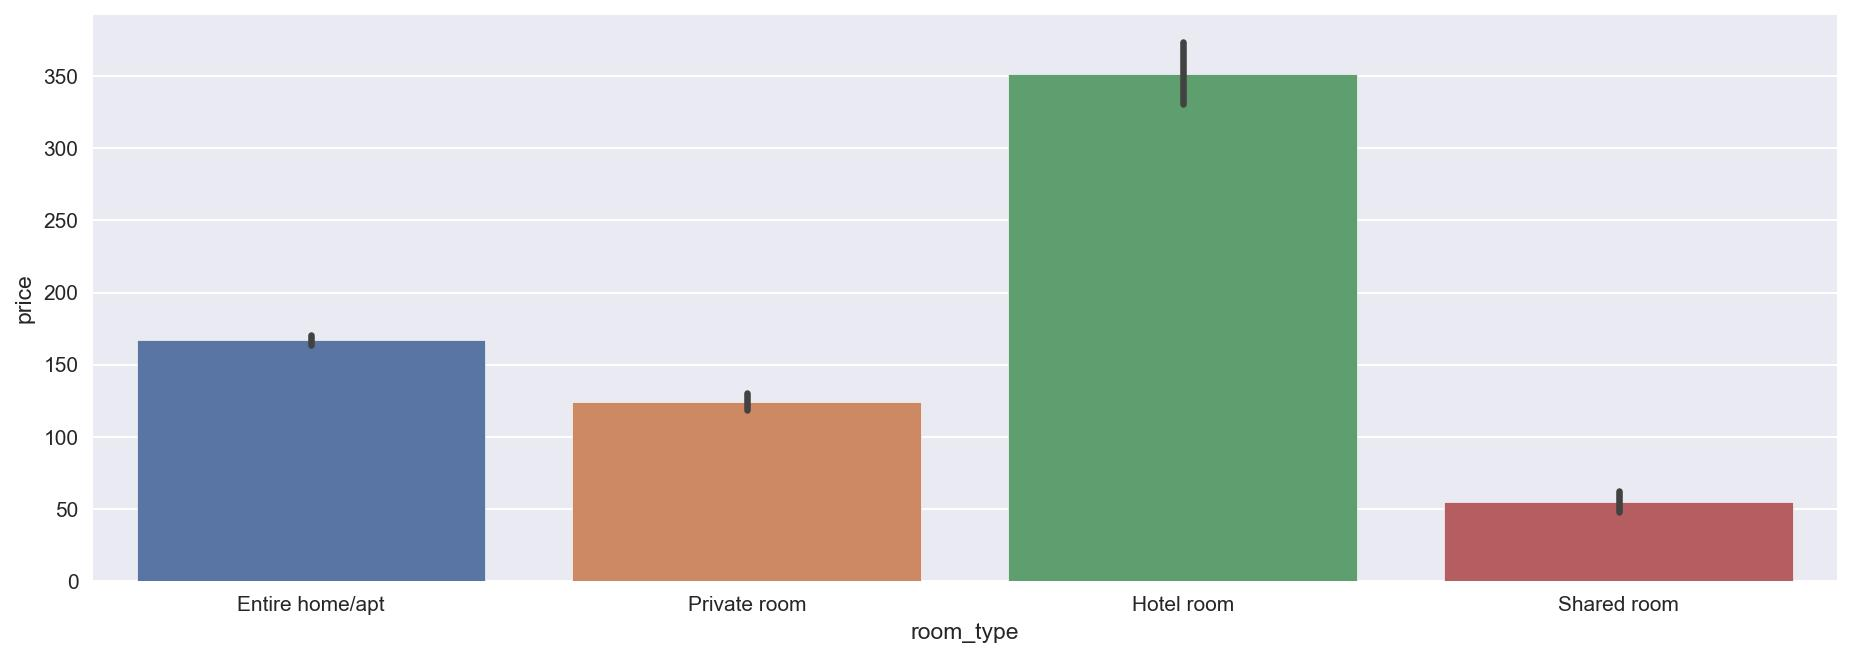

In [5]:
sns.barplot(data=df, x='room_type', y='price')

<AxesSubplot:xlabel='room_type', ylabel='reviews_per_month'>

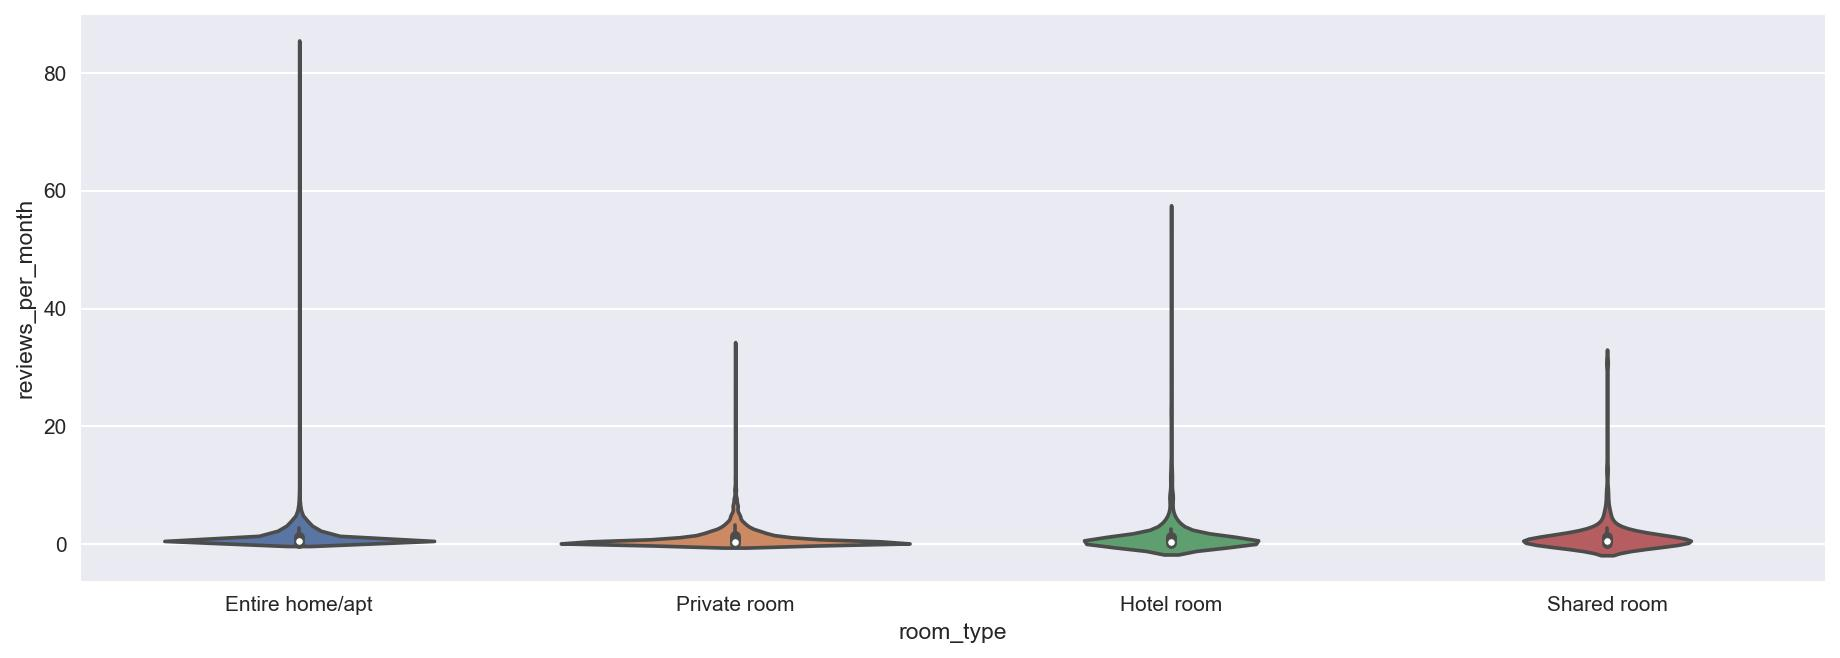

In [6]:
sns.violinplot(x='room_type', y='reviews_per_month', data=df)

<AxesSubplot:xlabel='room_type', ylabel='reviews_per_month'>

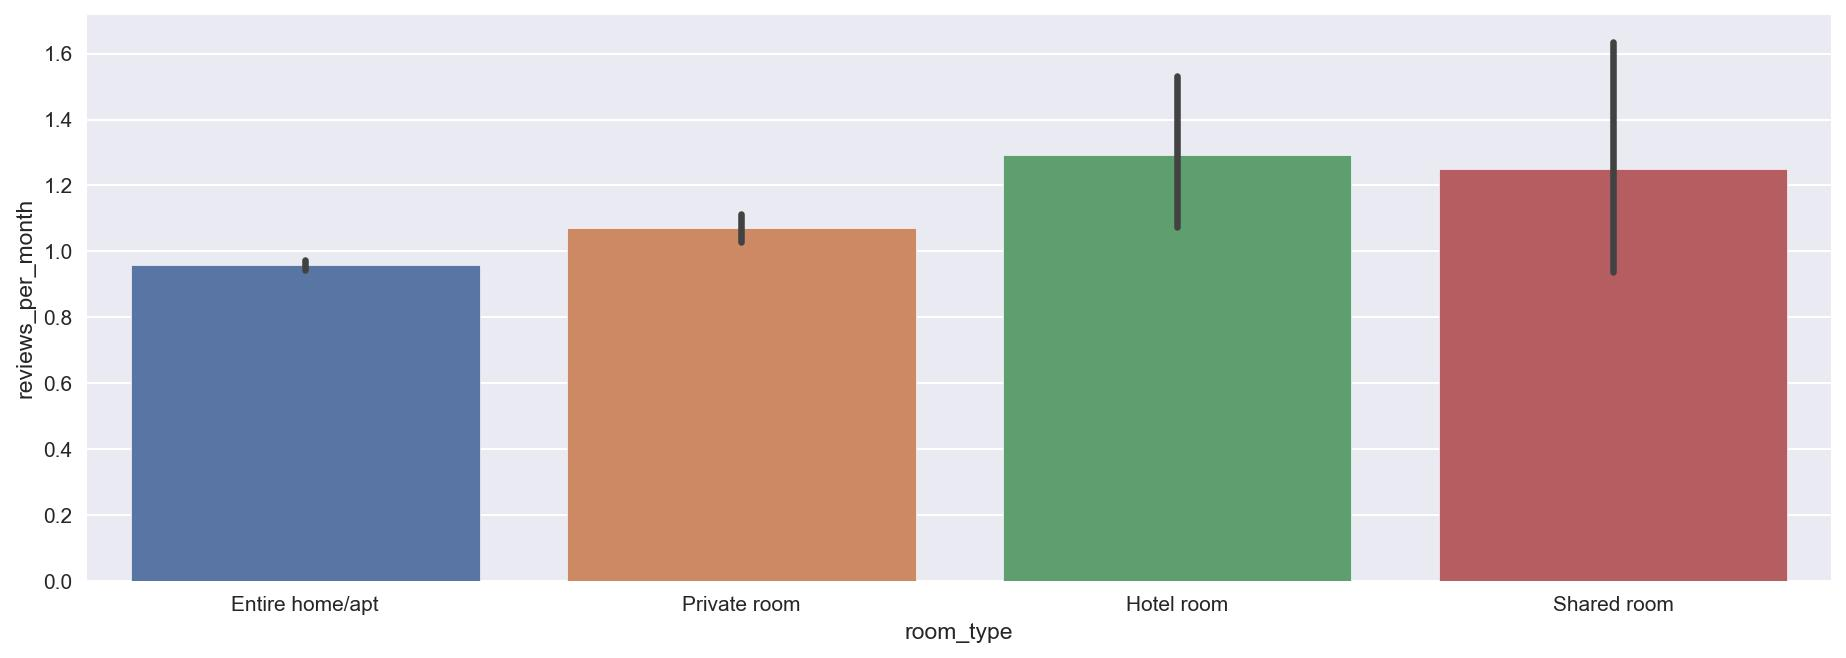

In [7]:
sns.barplot(data=df, x='room_type', y='reviews_per_month')

<AxesSubplot:xlabel='room_type', ylabel='availability_30'>

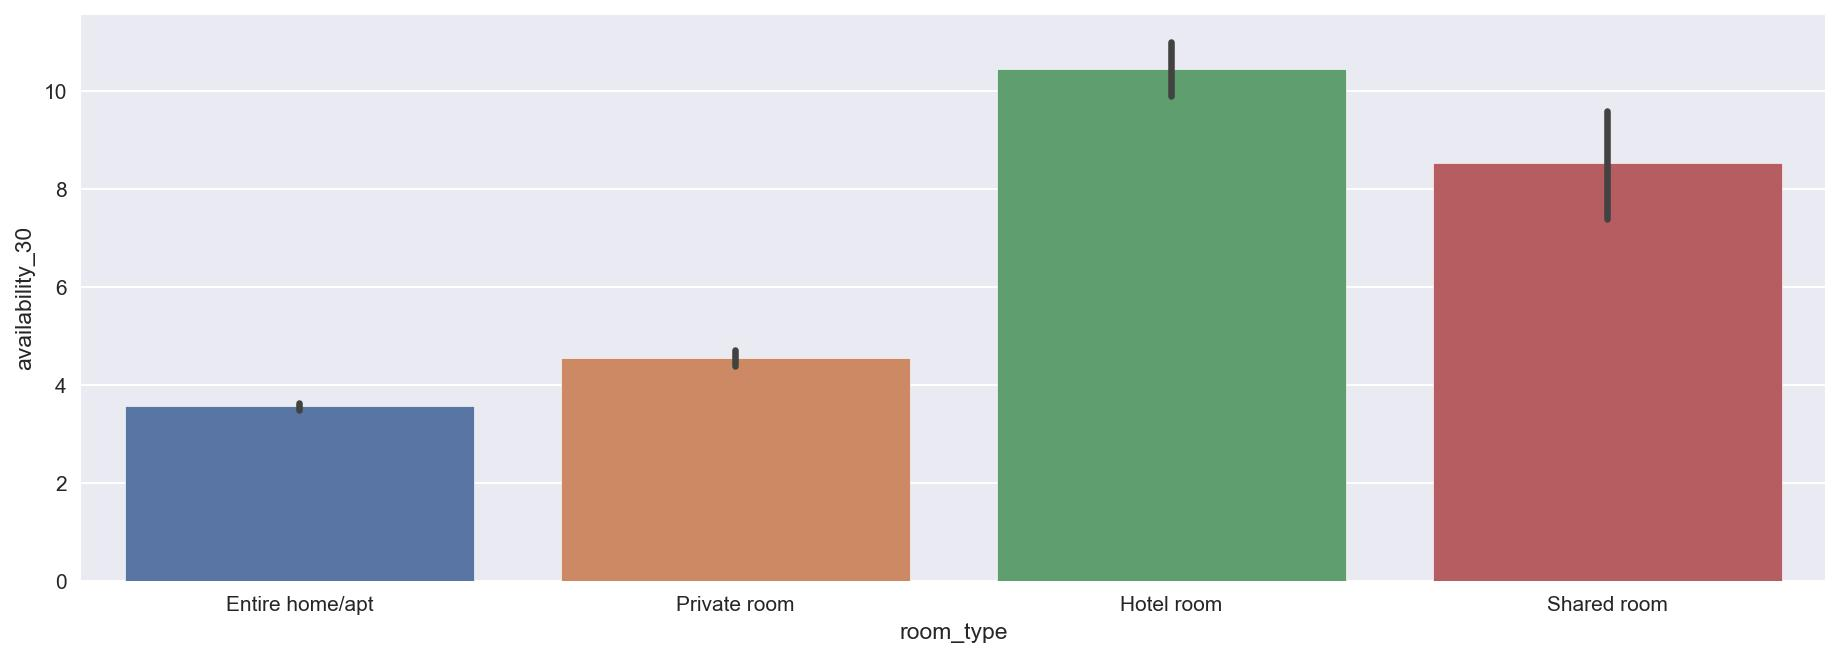

In [8]:
sns.barplot(data=df, x='room_type', y='availability_30')

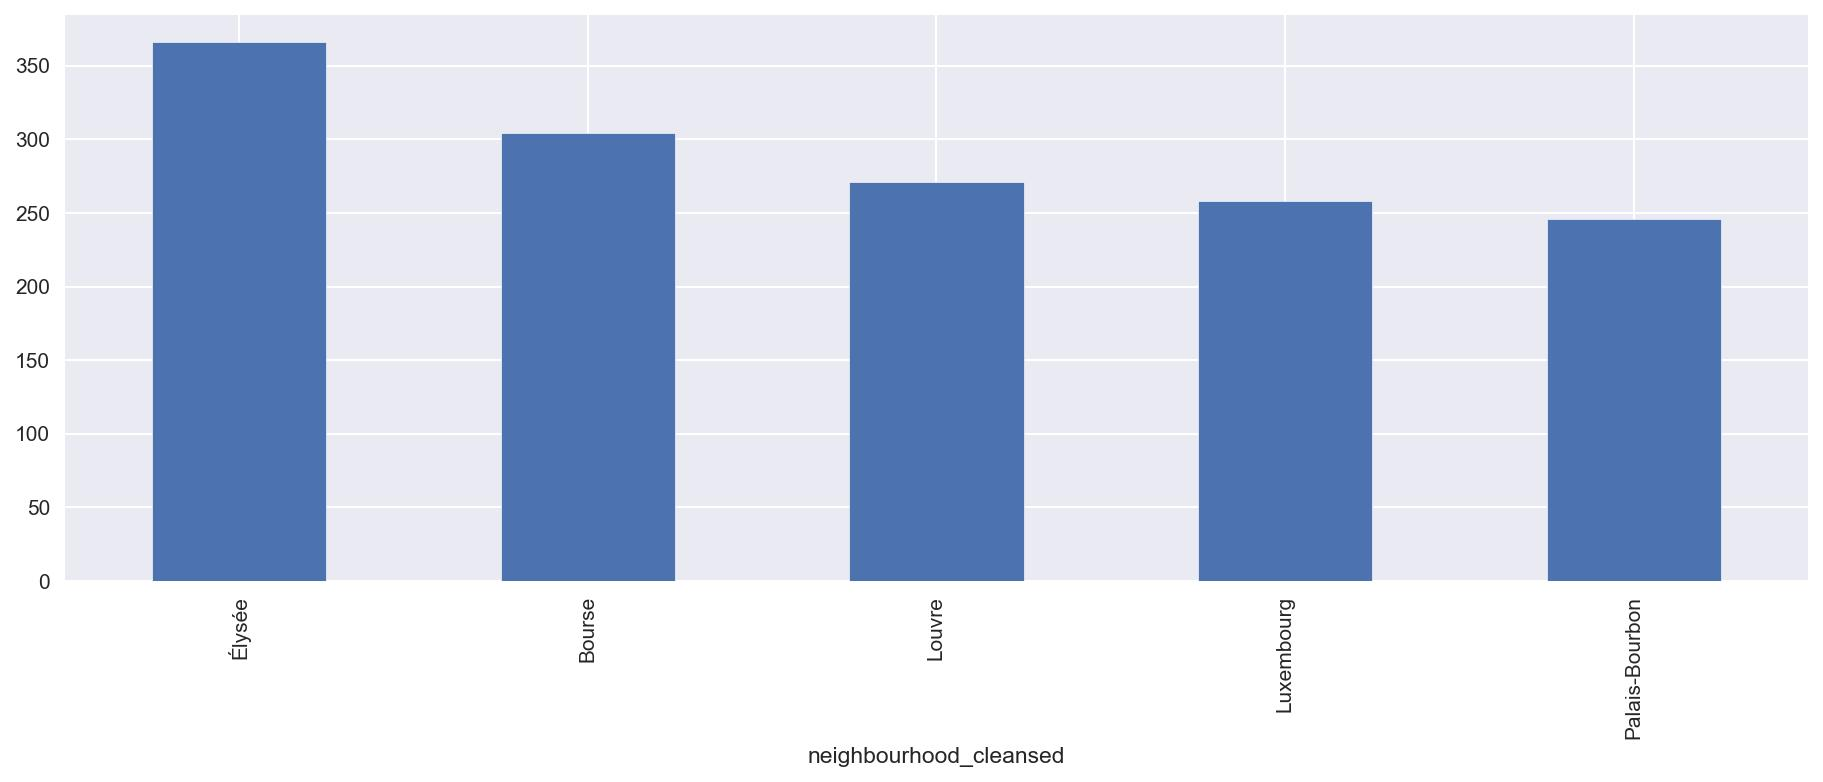

In [9]:
df.groupby('neighbourhood_cleansed')['price'].mean().nlargest(5).plot.bar()
# plt.xticks(rotation=80)
plt.show()

In [10]:
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')

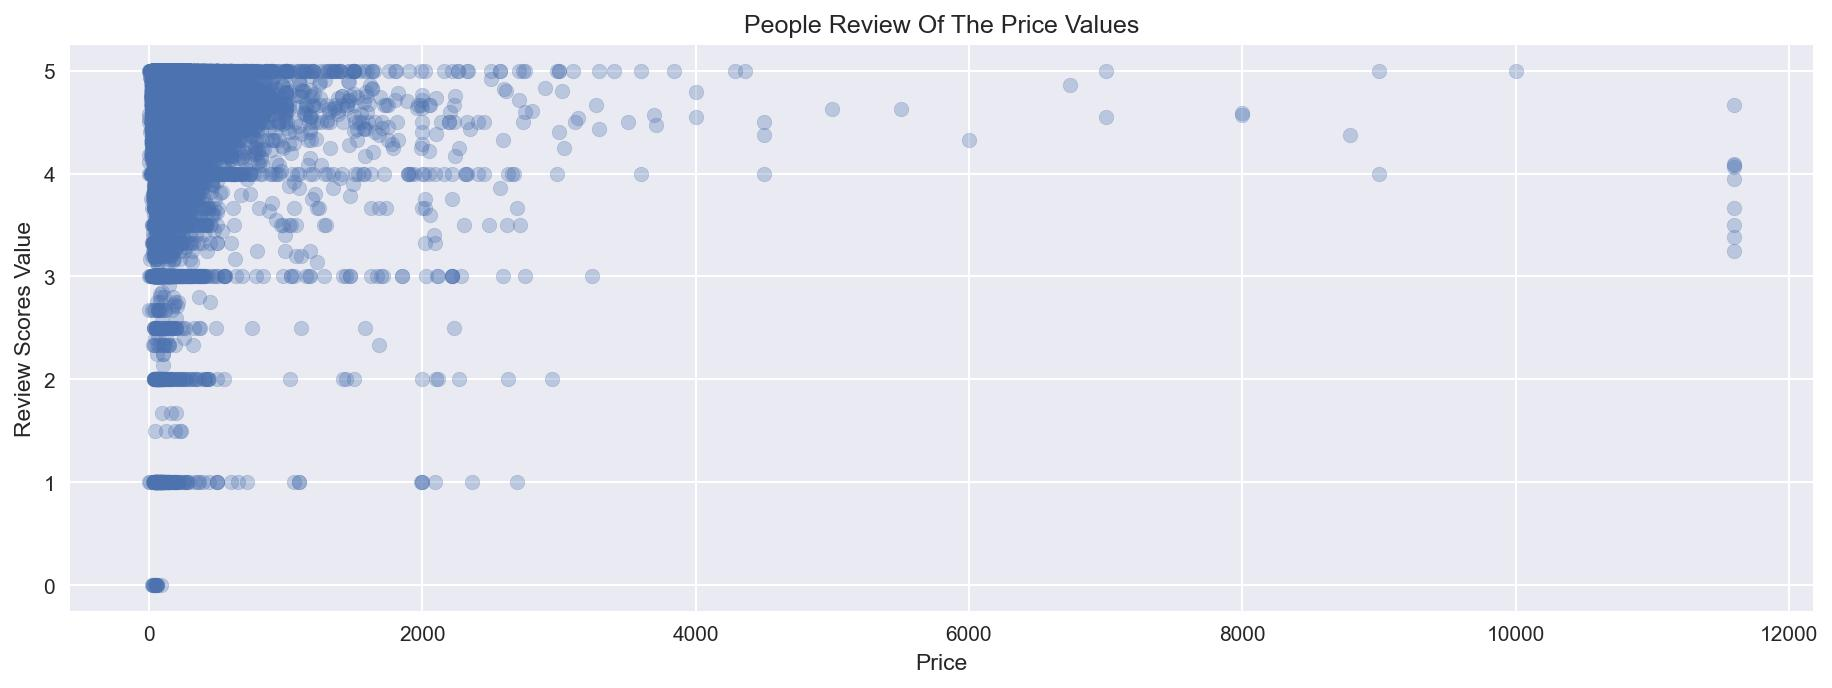

In [11]:
plt.scatter(x=df['price'], y=df['review_scores_value'], alpha=0.3)
plt.title('people review of the price values'.title())
plt.xlabel('Price')
plt.ylabel('review scores value'.title())
plt.show()

In [12]:
model = ols('review_scores_value ~ price', df)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     review_scores_value   R-squared:                       0.006
Model:                             OLS   Adj. R-squared:                  0.005
Method:                  Least Squares   F-statistic:                     247.2
Date:                 Wed, 06 Jul 2022   Prob (F-statistic):           1.50e-55
Time:                         08:41:22   Log-Likelihood:                -29248.
No. Observations:                44668   AIC:                         5.850e+04
Df Residuals:                    44666   BIC:                         5.852e+04
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6267      0.002   1856.328      0.000       4.622       4.632
price         -0.0001    7.7e-06    -15.722      0.000      -0.000      -0.000
==============================================================================
Omnibus:                    33805.338   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           811476.013
Skew:                          -3.468   Prob(JB):                         0.00
Kurtosis:                      22.695   Cond. No.                         366.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
sm.stats.anova_lm(result, typ=2)

,sum_sq,df,F,PR(>F)
price,53.618728,1.0,247.186997,1.502756e-55
Residual,9688.754493,44666.0,NaN,NaN


In [14]:
data = df[['price', 'review_scores_value', 'room_type']].dropna()
res = ols('review_scores_value ~ price + room_type', data).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     review_scores_value   R-squared:                       0.007
Model:                             OLS   Adj. R-squared:                  0.007
Method:                  Least Squares   F-statistic:                     81.85
Date:                 Wed, 06 Jul 2022   Prob (F-statistic):           2.41e-69
Time:                         08:41:22   Log-Likelihood:                -29208.
No. Observations:                44668   AIC:                         5.843e+04
Df Residuals:                    44663   BIC:                         5.847e+04
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     4.6224      0.003   1721.692      0.000       4.617       4.628
room_type[T.Hotel room]      -0.1024      0.017     -6.057      0.000      -0.136      -0.069
room_type[T.Private room]     0.0408      0.007      6.214      0.000       0.028       0.054
room_type[T.Shared room]     -0.0197      0.028     -0.705      0.481      -0.074       0.035
price                        -0.0001   7.73e-06    -14.830      0.000      -0.000   -9.95e-05
==============================================================================
Omnibus:                    33887.289   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           819953.520
Skew:                          -3.478   Prob(JB):                         0.00
Kurtosis:                      22.803   Cond. No.                     4.10e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.1e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
res.params

Intercept                    4.622352
room_type[T.Hotel room]     -0.102418
room_type[T.Private room]    0.040761
room_type[T.Shared room]    -0.019651
price                       -0.000115
dtype: float64

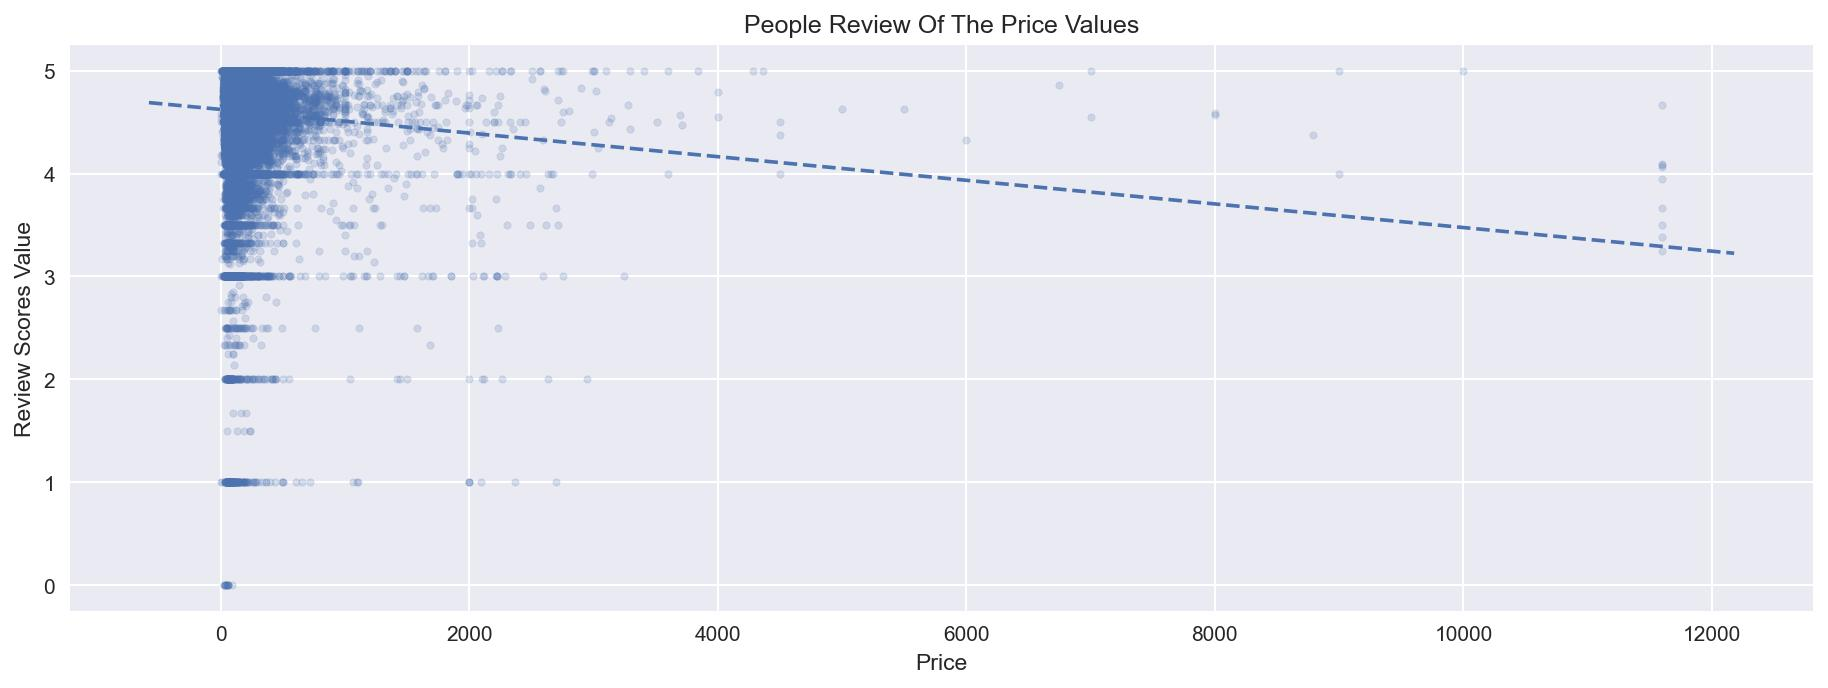

In [16]:
plt.scatter(x=df['price'], y=df['review_scores_value'], alpha=0.2, marker='.')
plt.title('people review of the price values'.title())
plt.xlabel('Price')
plt.ylabel('review scores value'.title())
abline(res.params[-1], res.params[0])
plt.show()

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


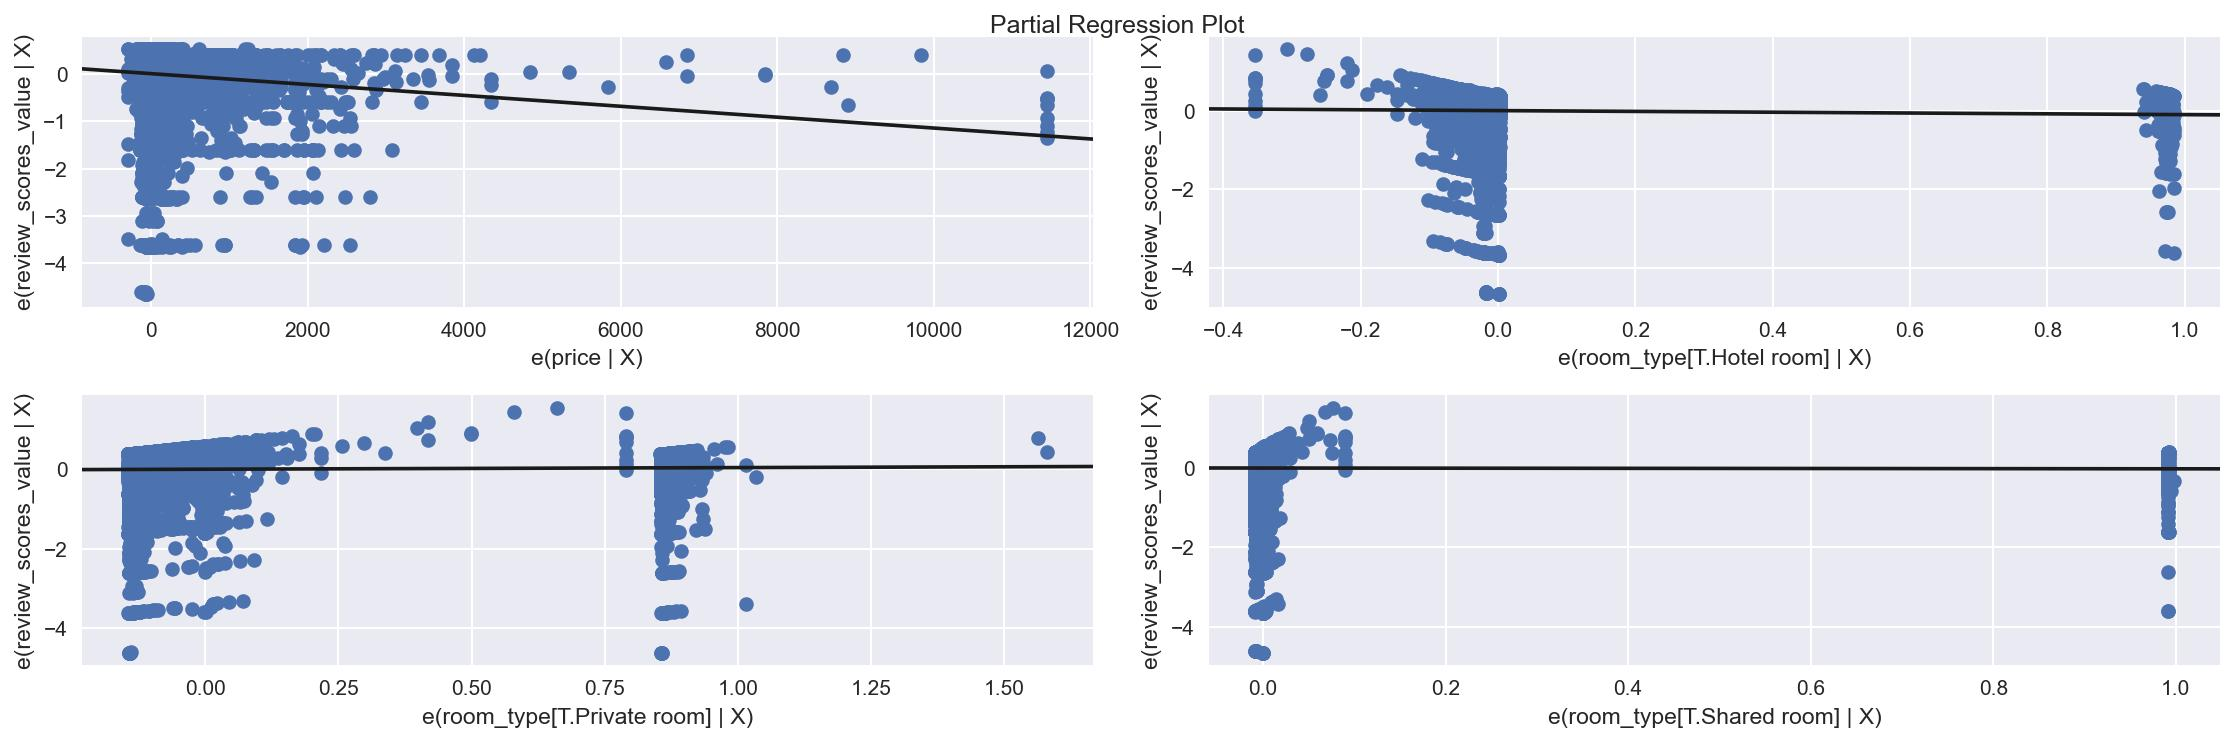

In [20]:
sm.graphics.plot_partregress_grid(res, ['price', 'room_type[T.Hotel room]', 'room_type[T.Private room]', 'room_type[T.Shared room]'])
plt.show()